In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer



In [2]:
df = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Id',
       'Kitchen AbvGr', 'Kitchen Qual', 'Land Contour', 'Land Slope',
       'Lot Area', 'Lot Config', 'Lot Frontage', 'Lot Shape',
       'Low Qual Fin SF', 'MS SubClass', 'MS Zoning', 'Mas Vnr Area',
       'Mas Vnr Type', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Neighborhood',
       

In [5]:
len(df.columns)

81

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
df.iloc[:,0:10].describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000


In [8]:
df.iloc[:,0].value_counts()

109     1
1377    1
1521    1
1719    1
1221    1
       ..
1965    1
1598    1
1796    1
2619    1
10      1
Name: Id, Length: 2051, dtype: int64

In [9]:
# Combine full bath and half bath to check if correlation increases
df['baths'] = df['Full Bath'] + df['Half Bath']

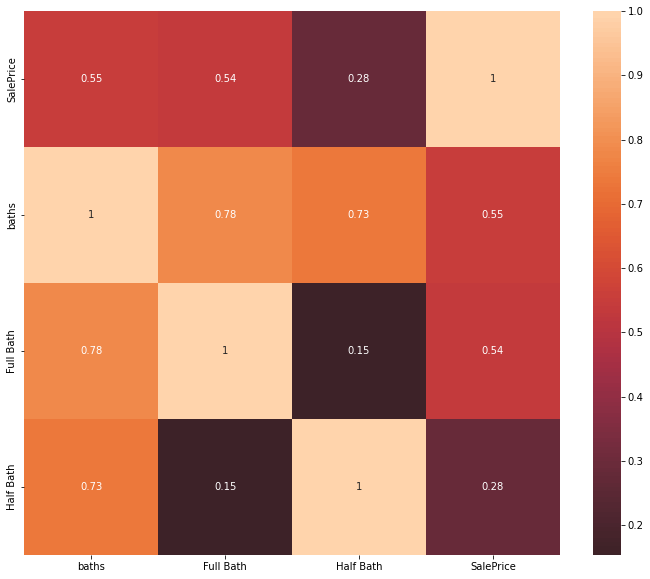

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['baths', 'Full Bath', 'Half Bath', 'SalePrice']].corr().sort_values(by='SalePrice', ascending=False), center=0, annot=True);

In [11]:
df[['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'baths', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Garage Yr Blt']]

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,baths,TotRms AbvGrd,Fireplaces,Garage Area,Garage Yr Blt
0,6,1976,2005,289.0,725.0,1479,3,6,0,475.0,1976.0
1,7,1996,1997,132.0,913.0,2122,3,8,1,559.0,1997.0
2,5,1953,2007,0.0,1057.0,1057,1,5,0,246.0,1953.0
3,5,2006,2007,0.0,384.0,1444,3,7,0,400.0,2007.0
4,6,1900,1993,0.0,676.0,1445,2,6,0,484.0,1957.0
...,...,...,...,...,...,...,...,...,...,...,...
2046,8,2007,2007,0.0,1884.0,1728,2,7,1,520.0,2007.0
2047,4,1940,1950,0.0,861.0,861,1,4,0,539.0,1961.0
2048,6,1928,1950,0.0,896.0,1913,2,9,1,342.0,1929.0
2049,4,1956,1956,0.0,1200.0,1200,1,6,2,294.0,1956.0


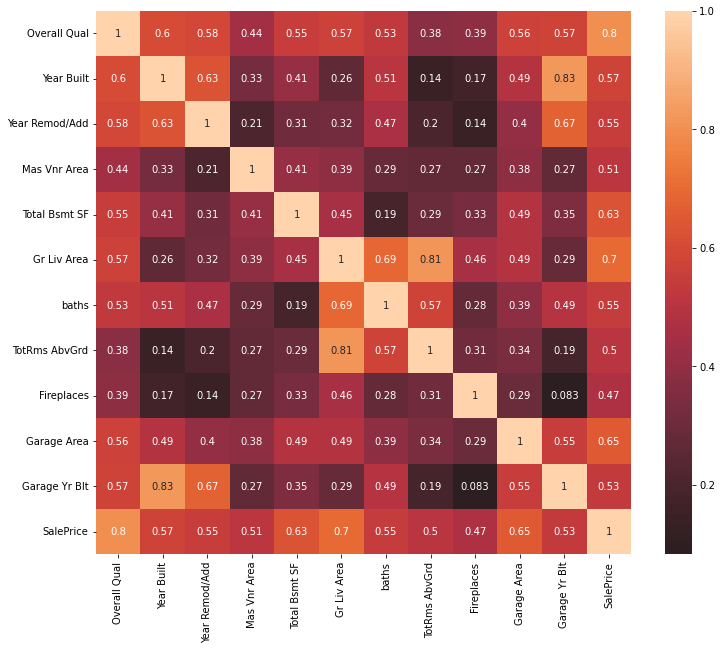

In [12]:
# check numeric correlations
plt.figure(figsize=(12,10))
sns.heatmap(df[['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'baths', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Garage Yr Blt', 'SalePrice']].corr(), center=0, annot=True);

In [13]:
# Combine year and month to check for price correlation against price per square foot
df['year_mo'] = round(df['Yr Sold'] + df['Mo Sold'] / 12, 2)
df['price_sqft'] = df['SalePrice']/df['Gr Liv Area']

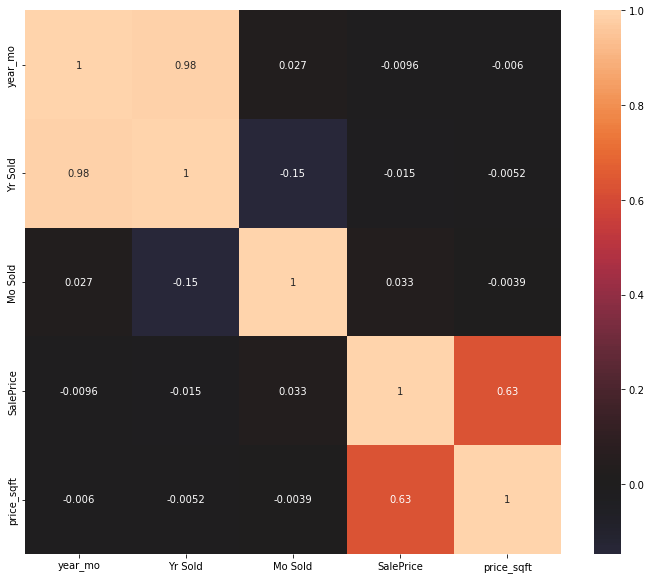

In [14]:
# check numeric correlations
plt.figure(figsize=(12,10))
sns.heatmap(df[['year_mo', 'Yr Sold', 'Mo Sold', 'SalePrice', 'price_sqft']].corr(), center=0, annot=True);

#### Interesting to see no correlation between sale price and time

In [15]:
keepers = ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'baths', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Garage Yr Blt', 'SalePrice']

<AxesSubplot:>

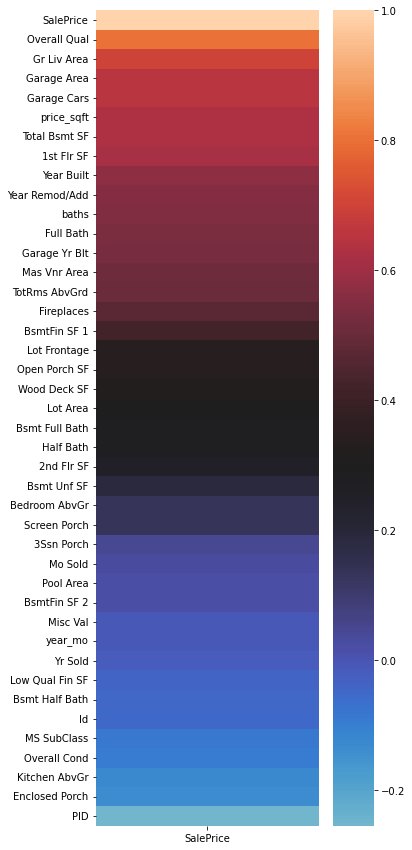

In [16]:
plt.figure(figsize=(5, 15))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), center=0.3);

In [17]:
df['Overall Qual'].isna().sum()

0

In [18]:
df['Overall Qual'].dtypes

dtype('int64')

In [19]:
df['Overall Qual'].value_counts().sort_values()

1       4
2       9
10     23
3      29
9      77
4     159
8     250
7     431
6     506
5     563
Name: Overall Qual, dtype: int64

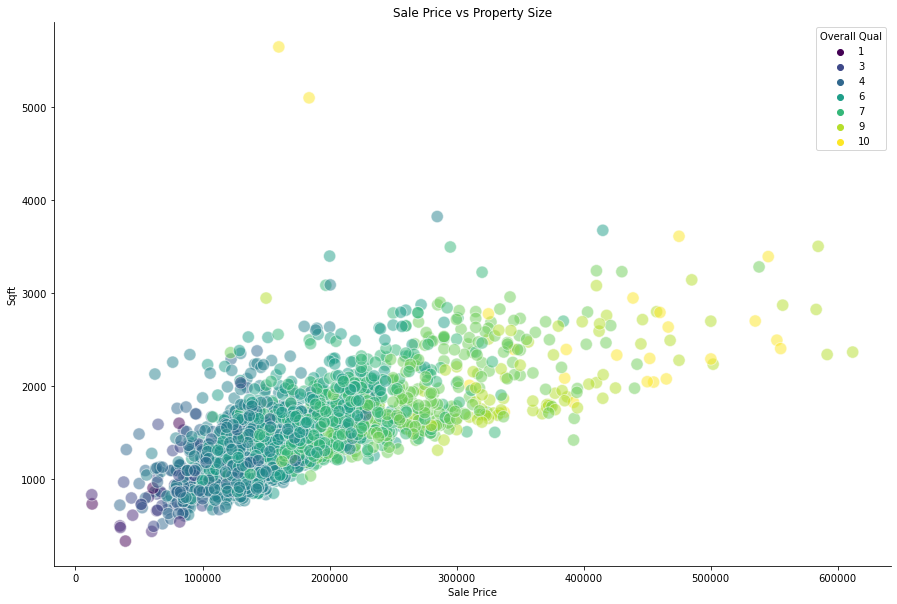

In [22]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['SalePrice'], y=df['Gr Liv Area'], hue=df['Overall Qual'], palette='viridis', markers='^', s=150, alpha=.5)
plt.xlabel('Sale Price')
plt.ylabel('Sqft')
plt.title('Sale Price vs Property Size')
sns.despine()
plt.show()

In [23]:
df[df['SalePrice'] < 50000].sort_values(by='SalePrice', ascending=True)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,baths,year_mo,price_sqft
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,6,2010,WD,12789,1,2010.50,15.371394
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,NaN,NaN,0,2,2008,WD,13100,1,2008.17,17.871760
1309,727,902477120,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,...,GdWo,NaN,0,11,2009,WD,34900,1,2009.92,48.472222
1292,2844,909101330,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,...,NaN,NaN,0,2,2006,ConLD,35000,1,2006.17,70.281124
1518,2881,911175430,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,10,2006,WD,35311,0,2006.83,73.564583
1564,710,902205030,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,...,GdWo,NaN,0,5,2009,WD,37900,1,2009.42,39.152893
1428,1902,534450090,20,RL,50.0,5000,Pave,NaN,Reg,Low,...,NaN,NaN,0,1,2007,WD,39300,1,2007.08,117.664671
408,1556,911102170,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,...,MnPrv,NaN,0,7,2008,WD,40000,1,2008.58,30.372058
103,728,902477130,30,C (all),72.0,9392,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,9,2009,WD,44000,1,2009.75,55.207026
1089,709,902205010,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,10,2009,WD,45000,1,2009.83,73.529412


In [24]:
df[df['SalePrice'] < 400_000]['SalePrice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2005, dtype: int64

(array([  6.,  23.,  80., 192., 418., 362., 307., 184., 128., 104.,  70.,
         53.,  37.,  21.,  20.]),
 array([ 12789.        ,  38523.06666667,  64257.13333333,  89991.2       ,
        115725.26666667, 141459.33333333, 167193.4       , 192927.46666667,
        218661.53333333, 244395.6       , 270129.66666667, 295863.73333333,
        321597.8       , 347331.86666667, 373065.93333333, 398800.        ]),
 <BarContainer object of 15 artists>)

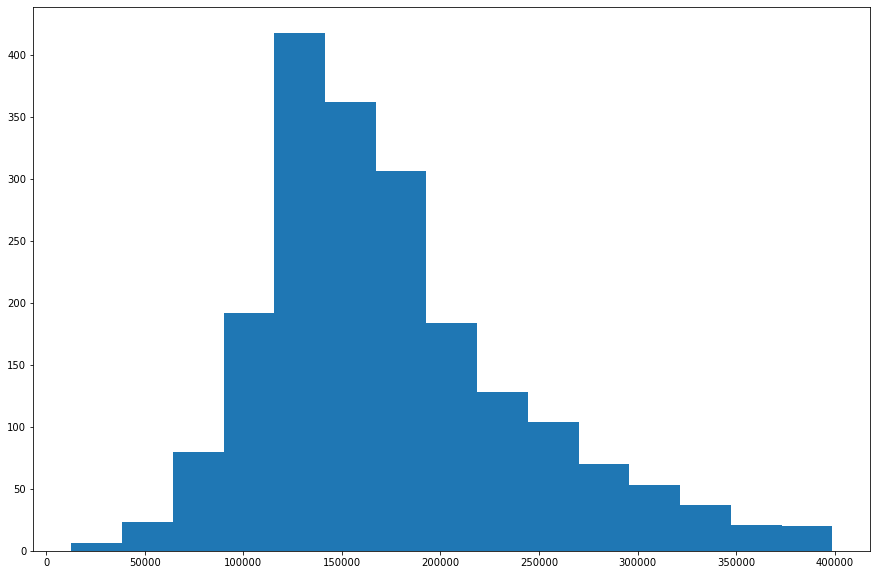

In [25]:
plt.figure(figsize=(15, 10))
plt.hist(df[df['SalePrice'] < 400_000]['SalePrice'], bins=15)

(array([  2.,   0.,   0.,   3.,   5.,  11.,  29., 120., 372., 552., 477.,
        268., 137.,  59.,  16.]),
 array([ 9.45634071,  9.71417979,  9.97201887, 10.22985795, 10.48769704,
        10.74553612, 11.0033752 , 11.26121428, 11.51905337, 11.77689245,
        12.03473153, 12.29257062, 12.5504097 , 12.80824878, 13.06608786,
        13.32392695]),
 <BarContainer object of 15 artists>)

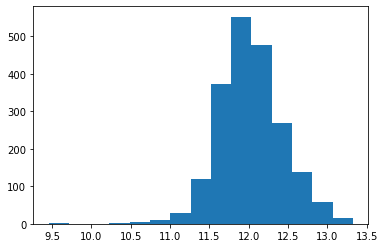

In [26]:
plt.hist(np.log(df['SalePrice']), bins=15)



#### Rename columns

In [28]:
column_dict = {
    'Id': 'id',
    'PID': 'pid',
    'MS SubClass': 'ms_subclass',
    'MS Zoning': 'ms_zoning',
    'Lot Frontage': 'frontage',
    'Lot Area': 'lot_sqft',
    'Street': 'street_material',
    'Alley': 'alley',
    'Lot Shape': 'shape',
    'Land Contour': 'contour',
    'Utilities': 'utilities',
    'Lot Config': 'config',
    'Land Slope': 'slope',
    'Neighborhood': 'neighborhood',
    'Condition 1': 'cond_1',
    'Condition 2': 'cond_2',
    'Bldg Type': 'type',
    'House Style': 'style',
    'Overall Qual': 'quality',
    'Overall Cond': 'condition',
    'Year Built': 'year',
    'Year Remod/Add': 'remod_year',
    'Roof Style': 'roof',
    'Roof Matl': 'roof_mat',
    'Exterior 1st': 'ext_1',
    'Exterior 2nd': 'ext_2',
    'Mas Vnr Type': 'mas_vnr_type',          # what?
    'Mas Vnr Area': 'mas_vnr_area',         # what?
    'Exter Qual': 'exter_qual',
    'Exter Cond': 'exter_cond',
    'Foundation': 'foundation',
    'Bsmt Qual': 'basement_qual',
    'Bsmt Cond': 'basement_cond',
    'Bsmt Exposure': 'basement_exposure',
    'BsmtFin Type 1': 'basement_fin_1',
    'BsmtFin SF 1': 'basement_fin_sqft_1',
    'BsmtFin Type 2': 'basement_fin_2',
    'BsmtFin SF 2': 'basement_fin_sqft_2',
    'Bsmt Unf SF': 'basement_unfin_sqft',
    'Total Bsmt SF': 'total_basement_sqft',
    'Heating': 'heating',
    'Heating QC': 'heating_qc',     # what?
    'Central Air': 'ac',
    'Electrical': 'electrical',
    '1st Flr SF': 'sqft_1',
    '2nd Flr SF': 'sqft_2',
    'Low Qual Fin SF': 'low_qual_sqft',         # what?
    'Gr Liv Area': 'gr_living_sqft',
    'Bsmt Full Bath': 'basement_bath',
    'Bsmt Half Bath': 'basement_half_bath',
    'Full Bath': 'full_bath',
    'Half Bath': 'half_bath',
    'Bedroom AbvGr': 'bed',
    'Kitchen AbvGr': 'kitchen',
    'Kitchen Qual': 'kitchen_qual',
    'TotRms AbvGrd': 'rooms_total',
    'Functional': 'functional',
    'Fireplaces': 'fireplaces',
    'Fireplace Qu': 'fireplace_qual',
    'Garage Type': 'garage_type',
    'Garage Yr Blt': 'garage_year',
    'Garage Finish': 'garage_finish',
    'Garage Cars': 'garage_size',
    'Garage Area': 'garage_sqft',
    'Garage Qual': 'garage_qual',
    'Garage Cond': 'garage_cond',
    'Paved Drive': 'paved_drive',
    'Wood Deck SF': 'deck_wood_sqft',
    'Open Porch SF': 'porch_sqft',
    'Enclosed Porch': 'porch_enc_sqft',
    '3Ssn Porch': 'porch_3_ssn',
    'Screen Porch': 'porch_screened',
    'Pool Area': 'pool_sqft',
    'Pool QC': 'pool_qc',           # what?
    'Fence': 'fence',
    'Misc Feature': 'misc',
    'Misc Val': 'misc_sqft',
    'Mo Sold': 'sold_month',
    'Yr Sold': 'sold_year',
    'Sale Type': 'sale_type',           # what
    'SalePrice': 'price'
}
df.rename(columns=column_dict, inplace=True)
df.head(2)

,id,pid,ms_subclass,ms_zoning,frontage,lot_sqft,street_material,alley,shape,contour,...,fence,misc,misc_sqft,sold_month,sold_year,sale_type,price,baths,year_mo,price_sqft
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,3,2010,WD,130500,3,2010.25,88.235294
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,4,2009,WD,220000,3,2009.33,103.675778


In [30]:
keepers = ['quality', 'year', 'remod_year', 'mas_vnr_area', 'total_basement_sqft', 'gr_living_sqft', 'baths', 'rooms_total', 'fireplaces', 'garage_sqft', 'garage_year', 'price']

In [31]:
df[keepers].isna().sum()

quality                  0
year                     0
remod_year               0
mas_vnr_area            22
total_basement_sqft      1
gr_living_sqft           0
baths                    0
rooms_total              0
fireplaces               0
garage_sqft              1
garage_year            114
price                    0
dtype: int64

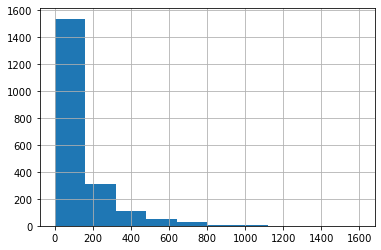

quality                  0
year                     0
remod_year               0
mas_vnr_area             0
total_basement_sqft      1
gr_living_sqft           0
baths                    0
rooms_total              0
fireplaces               0
garage_sqft              1
garage_year            114
price                    0
dtype: int64

In [33]:
df['mas_vnr_area'].hist()
plt.show()
df['mas_vnr_area'].fillna(0, inplace=True)
df[keepers].isna().sum()


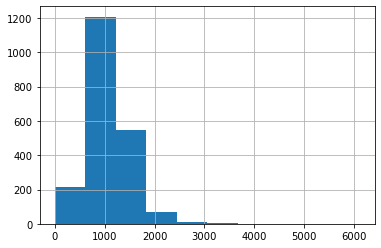

quality                  0
year                     0
remod_year               0
mas_vnr_area             0
total_basement_sqft      0
gr_living_sqft           0
baths                    0
rooms_total              0
fireplaces               0
garage_sqft              1
garage_year            114
price                    0
dtype: int64

In [34]:
df['total_basement_sqft'].hist()
plt.show()
df['total_basement_sqft'].fillna(0, inplace=True)
df[keepers].isna().sum()

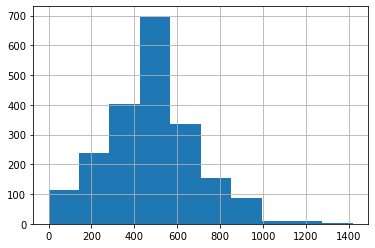

quality                  0
year                     0
remod_year               0
mas_vnr_area             0
total_basement_sqft      0
gr_living_sqft           0
baths                    0
rooms_total              0
fireplaces               0
garage_sqft              0
garage_year            114
price                    0
dtype: int64

In [37]:
df['garage_sqft'].hist()
plt.show()
df['garage_sqft'].fillna(df['garage_sqft'].mean(), inplace=True)
df[keepers].isna().sum()

<AxesSubplot:>

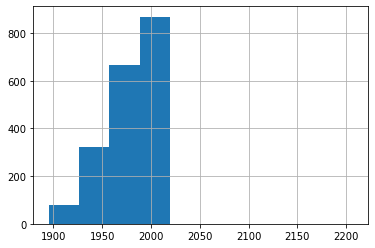

In [39]:
df['garage_year'].hist()

In [35]:
si = SimpleImputer(strategy='most_frequent')

In [44]:
df['garage_year'] = si.fit_transform(np.array(df['garage_year']).reshape(-1,1))

In [47]:
df[keepers].isna().sum()

quality                0
year                   0
remod_year             0
mas_vnr_area           0
total_basement_sqft    0
gr_living_sqft         0
baths                  0
rooms_total            0
fireplaces             0
garage_sqft            0
garage_year            0
price                  0
dtype: int64

In [49]:
df.to_csv('./datasets/simple_model.csv', index=False)

#### Null Model

In [24]:
round(df['price'].mean(), 0)

181470.0

#### Simple linear model

<AxesSubplot:>

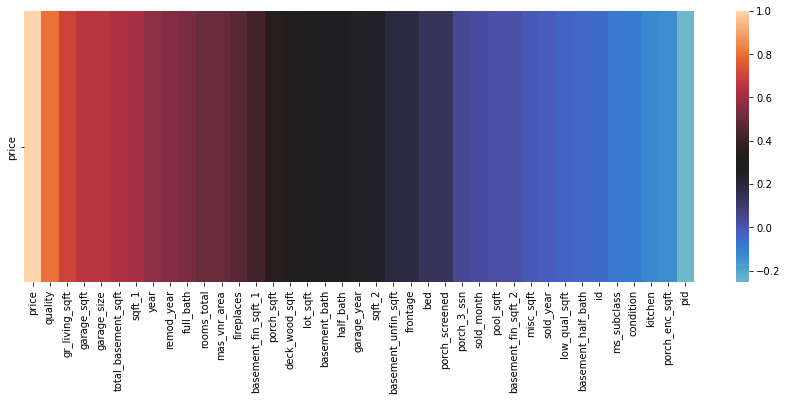

In [25]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False).T, center=0.3)

#### Select Data

In [26]:
X = df[['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'sqft_1', 'year', 'full_bath', 'rooms_total']]
y = df['price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110)

#### Scale Data

In [28]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

In [29]:
X_train_scaled.head(3)

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,sqft_1,year,full_bath,rooms_total
20,-0.783373,-1.208611,-0.119605,-0.371841,-0.680284,-0.135237,-1.069917,-0.933249
2011,-0.082892,-0.505928,0.237335,0.408455,0.199046,-0.433365,-1.069917,0.338649
1063,0.617590,0.061322,0.255640,1.038359,0.908896,1.090402,0.736376,0.338649


In [30]:
X_test_scaled.head(3)

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,sqft_1,year,full_bath,rooms_total
1507,-0.082892,0.194792,-0.783147,-0.140804,-0.252900,-0.632117,-1.069917,0.338649
494,-0.082892,-1.047661,0.127507,-0.193114,-0.478874,-0.135237,-1.069917,-1.569198
553,-0.783373,-0.719873,-0.769418,0.170879,-0.068683,-0.433365,-1.069917,-0.297300


#### Build simple model

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
lr.feature_names_in_

array(['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft',
       'sqft_1', 'year', 'full_bath', 'rooms_total'], dtype=object)

In [34]:
lr.coef_

array([31920.51910563, 21940.36734592, 10799.88798756,  6189.84884028,
        7765.78011382, 10832.83832995,  -984.89842833,   -40.22857238])

In [35]:
pd.DataFrame(zip(lr.feature_names_in_, lr.coef_,), index=lr.feature_names_in_).T.drop(0)

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,sqft_1,year,full_bath,rooms_total
1,31920.519106,21940.367346,10799.887988,6189.84884,7765.780114,10832.83833,-984.898428,-40.228572


In [36]:
y_test

1507    149900
494     157500
553     136000
1290    127500
311     190000
         ...  
318     239000
2019    167000
1418    345474
1853    238500
1796    582933
Name: price, Length: 513, dtype: int64

In [37]:
pred_index = y_test.sort_values().index
pred_index

Int64Index([ 183, 1309, 1089, 2010, 1374,  700, 1429, 1192, 1516, 1643,
            ...
            1732, 1624,  286, 1389,  361,   41, 1035, 1592,  623, 1796],
           dtype='int64', length=513)

In [38]:
y_test.loc[pred_index,]

183      13100
1309     34900
1089     45000
2010     51689
1374     52000
         ...  
41      465000
1035    475000
1592    535000
623     552000
1796    582933
Name: price, Length: 513, dtype: int64

In [39]:
X_test.loc[pred_index,]

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,sqft_1,year,full_bath,rooms_total
183,1,733,487.0,0.0,733,1952,1,4
1309,4,720,0.0,720.0,720,1920,1,4
1089,2,612,308.0,0.0,612,1940,1,4
2010,3,729,0.0,0.0,729,1945,1,5
1374,3,729,0.0,270.0,729,1935,1,5
...,...,...,...,...,...,...,...,...
41,10,2076,850.0,2076.0,2076,2006,2,7
1035,10,3608,840.0,1107.0,1518,1892,2,12
1592,10,2698,736.0,1850.0,1850,2006,2,11
623,10,2492,949.0,2492.0,2492,2004,2,8


In [40]:
X_test_scaled

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,sqft_1,year,full_bath,rooms_total
1507,-0.082892,0.194792,-0.783147,-0.140804,-0.252900,-0.632117,-1.069917,0.338649
494,-0.082892,-1.047661,0.127507,-0.193114,-0.478874,-0.135237,-1.069917,-1.569198
553,-0.783373,-0.719873,-0.769418,0.170879,-0.068683,-0.433365,-1.069917,-0.297300
1290,-0.082892,-0.454895,-1.080597,-0.459025,-0.778533,-0.598992,-1.069917,-0.297300
311,-0.082892,0.948508,0.086322,-0.522233,-0.181670,-0.035861,0.736376,0.974598
...,...,...,...,...,...,...,...,...
318,2.018552,0.569687,1.033586,1.602875,1.545059,1.156653,0.736376,0.338649
2019,-0.783373,0.051508,-0.348412,-0.646471,-0.989769,1.090402,0.736376,-0.297300
1418,1.318071,1.201709,2.113558,2.274191,2.335964,1.156653,0.736376,0.338649
1853,1.318071,-0.121219,0.987824,0.670007,0.680466,1.123527,0.736376,-0.297300


In [41]:
y_pred = lr.predict(X_test_scaled.loc[pred_index,])

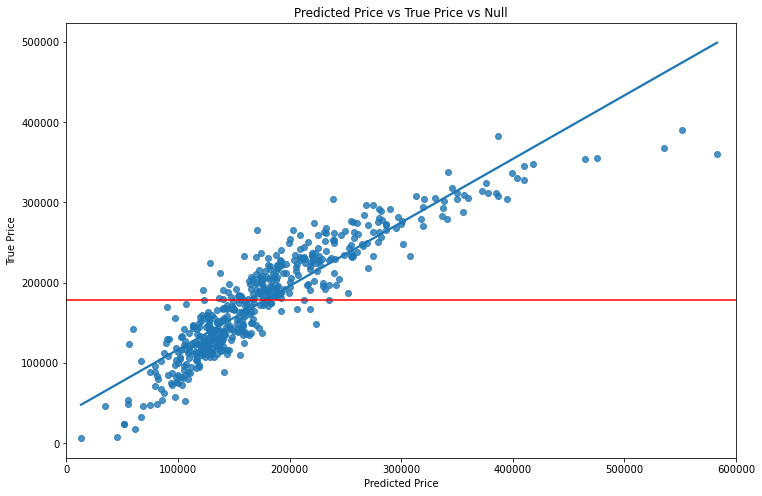

In [42]:
plt.figure(figsize=(12, 8))
sns.regplot(x=y_test.loc[pred_index], y=y_pred, ci=None)
plt.hlines(y=y_test.mean(), xmin=0, xmax=1_000_000, color='red')
plt.xlim(0, 600000)

plt.title("Predicted Price vs True Price vs Null")
plt.xlabel('Predicted Price')
plt.ylabel('True Price');

#### Check errors for normal distribution

<AxesSubplot:>

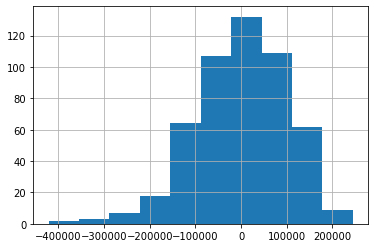

In [43]:
(y_pred - y_test).hist()

In [44]:
round(mean_squared_error(y_test.loc[pred_index], y_pred, squared=False), 0)

32308.0

In [45]:
print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.7729171507559457
0.8285780754308982


In [46]:
round(mean_squared_error(y_test, np.full_like(y_test, y_test.mean()), squared=False), 0)

78033.0

In [47]:
moving_error = y_pred - y_test.loc[pred_index]

#### As price increases, so does our error. We likely need to add polynomials to capture some of the curve

Text(0, 0.5, 'Predicted Price Error')

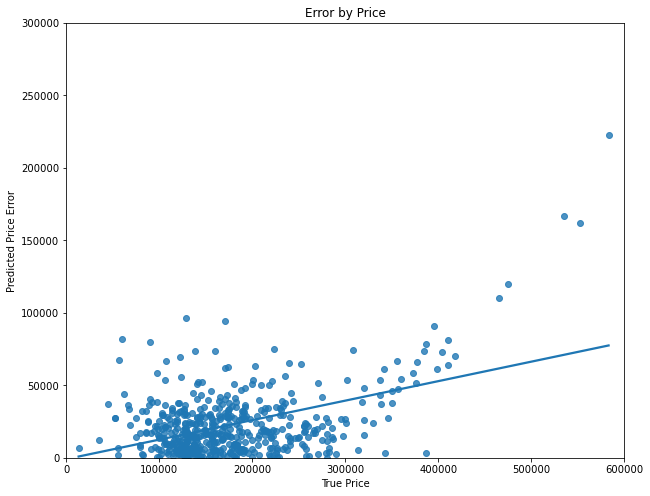

In [48]:
# Error Plot
plt.figure(figsize=(10, 8))
plt.title("Error by Price")
plt.xlim(0, 600_000)
plt.ylim(0, 300_000)
sns.regplot(x=y_test.loc[pred_index], y=round(np.abs(moving_error), 0), ci=None)
plt.xlabel("True Price")
plt.ylabel("Predicted Price Error")


#### Adding polynomials

In [49]:
poly = PolynomialFeatures(include_bias=False)

In [50]:
X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(X_train.columns), index=X_train.index)
X_test_poly = pd.DataFrame(poly.fit_transform(X_test), columns=poly.get_feature_names_out(X_test.columns), index=X_test.index)

In [51]:
print(X_train.shape)
print(X_train_poly.shape)

(1538, 8)
(1538, 44)


In [52]:
poly.get_feature_names_out(X_train.columns)

array(['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft',
       'sqft_1', 'year', 'full_bath', 'rooms_total', 'quality^2',
       'quality gr_living_sqft', 'quality garage_sqft',
       'quality total_basement_sqft', 'quality sqft_1', 'quality year',
       'quality full_bath', 'quality rooms_total', 'gr_living_sqft^2',
       'gr_living_sqft garage_sqft', 'gr_living_sqft total_basement_sqft',
       'gr_living_sqft sqft_1', 'gr_living_sqft year',
       'gr_living_sqft full_bath', 'gr_living_sqft rooms_total',
       'garage_sqft^2', 'garage_sqft total_basement_sqft',
       'garage_sqft sqft_1', 'garage_sqft year', 'garage_sqft full_bath',
       'garage_sqft rooms_total', 'total_basement_sqft^2',
       'total_basement_sqft sqft_1', 'total_basement_sqft year',
       'total_basement_sqft full_bath', 'total_basement_sqft rooms_total',
       'sqft_1^2', 'sqft_1 year', 'sqft_1 full_bath',
       'sqft_1 rooms_total', 'year^2', 'year full_bath',
       'year rooms_tota

In [53]:
X_train_poly.head(2)

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,sqft_1,year,full_bath,rooms_total,quality^2,quality gr_living_sqft,...,sqft_1^2,sqft_1 year,sqft_1 full_bath,sqft_1 rooms_total,year^2,year full_bath,year rooms_total,full_bath^2,full_bath rooms_total,rooms_total^2
20,5.0,894.0,450.0,894.0,894.0,1968.0,1.0,5.0,25.0,4470.0,...,799236.0,1759392.0,894.0,4470.0,3873024.0,1968.0,9840.0,1.0,5.0,25.0
2011,6.0,1252.0,528.0,1252.0,1252.0,1959.0,1.0,7.0,36.0,7512.0,...,1567504.0,2452668.0,1252.0,8764.0,3837681.0,1959.0,13713.0,1.0,7.0,49.0


In [54]:
X_train_poly_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train_poly.index)
X_test_poly_scaled = pd.DataFrame(ss.fit_transform(X_test_poly), columns=X_test_poly.columns, index=X_test_poly.index)
X_train_poly_scaled

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,sqft_1,year,full_bath,rooms_total,quality^2,quality gr_living_sqft,...,sqft_1^2,sqft_1 year,sqft_1 full_bath,sqft_1 rooms_total,year^2,year full_bath,year rooms_total,full_bath^2,full_bath rooms_total,rooms_total^2
20,-0.783373,-1.208611,-0.119605,-0.371841,-0.680284,-0.135237,-1.069917,-0.933249,-0.802314,-1.030602,...,-0.545884,-0.676696,-0.921316,-0.763378,-0.143420,-1.059580,-0.933093,-1.003253,-1.032573,-0.842587
2011,-0.082892,-0.505928,0.237335,0.408455,0.199046,-0.433365,-1.069917,0.338649,-0.192486,-0.424604,...,0.022642,0.170492,-0.608109,0.211236,-0.441644,-1.067661,0.304349,-1.003253,-0.673315,0.205133
1063,0.617590,0.061322,0.255640,1.038359,0.908896,1.090402,0.736376,0.338649,0.528220,0.227810,...,0.619961,0.948956,0.992922,0.670398,1.096971,0.774058,0.407230,0.630707,0.584085,0.205133
877,0.617590,-1.002517,0.511904,-0.262861,-0.422380,-0.367114,-1.069917,-0.297300,0.528220,-0.527994,...,-0.398796,-0.432726,-0.829454,-0.417474,-0.375490,-1.065865,-0.317727,-1.003253,-0.852944,-0.362382
760,0.617590,-0.574626,0.095474,0.268961,0.113078,0.593521,0.736376,-0.297300,0.528220,-0.223999,...,-0.041306,0.132808,0.426000,-0.120596,0.591325,0.747119,-0.262133,0.630707,0.224828,-0.362382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,-0.783373,-0.706134,-0.860941,0.186136,-0.051490,-0.367114,-1.069917,-0.297300,-0.802314,-0.775612,...,-0.158664,-0.070876,-0.697347,-0.211838,-0.375490,-1.065865,-0.317727,-1.003253,-0.852944,-0.362382
431,1.318071,1.023094,0.461567,0.138185,-0.105527,0.991026,0.736376,0.338649,1.359803,1.315697,...,-0.195750,-0.067081,0.270271,0.014225,0.995538,0.768670,0.400520,0.630707,0.584085,0.205133
1881,0.617590,-0.233099,0.246487,0.711419,0.540461,1.057277,0.736376,-0.933249,0.528220,0.018639,...,0.294504,0.579737,0.730458,-0.199355,1.063143,0.772262,-0.875582,0.630707,-0.134429,-0.842587
1295,-1.483855,-1.479477,-0.165366,-0.881867,-1.019244,-1.493377,-1.069917,-1.569198,-1.301264,-1.318660,...,-0.714385,-1.046451,-1.042050,-1.091578,-1.490923,-1.096396,-1.614278,-1.003253,-1.212201,-1.235482


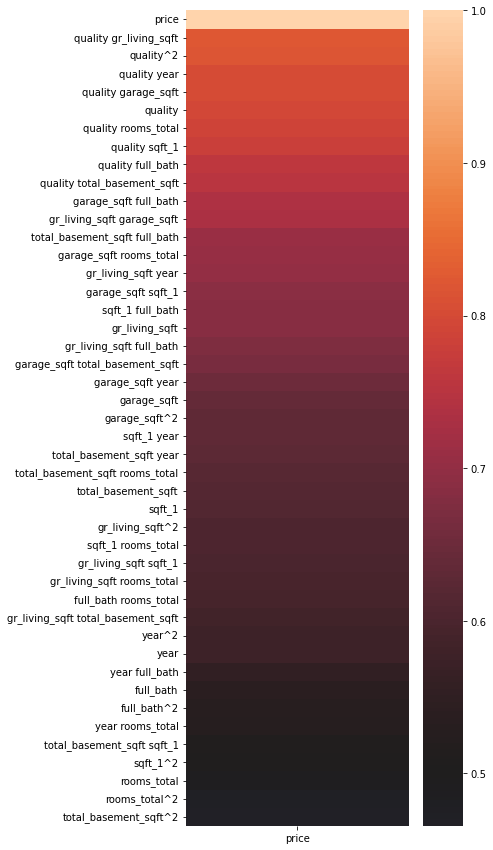

In [55]:
poly_corr = pd.concat([y_train, X_train_poly_scaled], axis=1)
plt.figure(figsize=(5, 15))
sns.heatmap(poly_corr.corr()[['price']].sort_values(by='price', ascending=False), center=0.5);

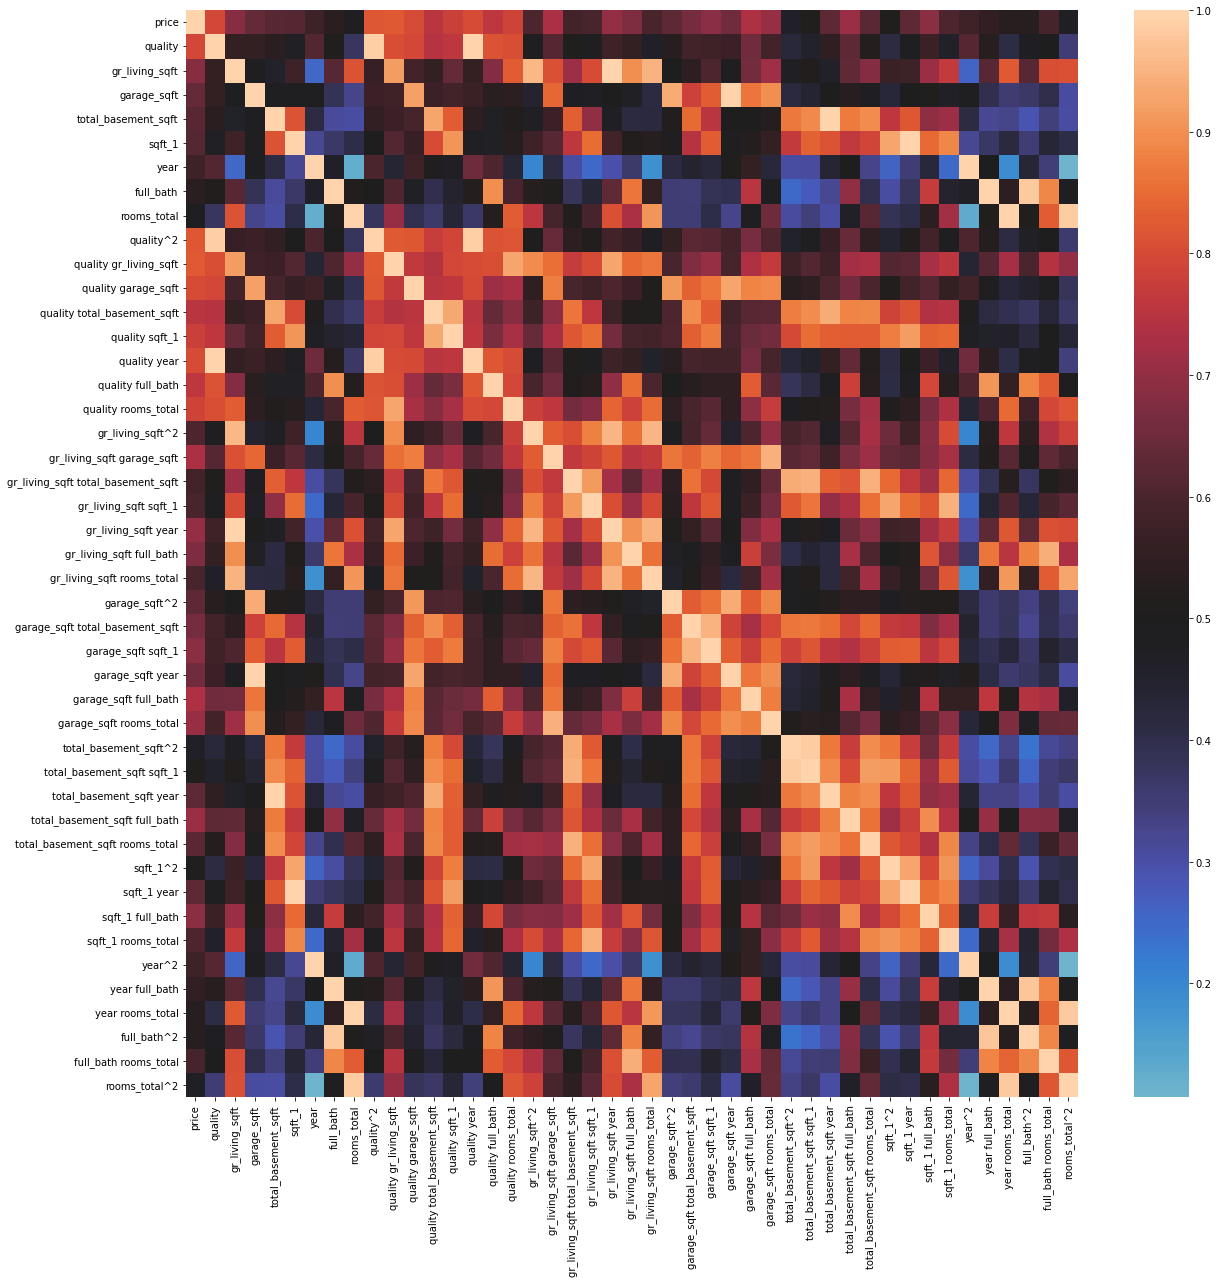

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(poly_corr.corr(), center=0.5);

In [57]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [58]:
print(f'Training:               {lr_poly.score(X_train_poly_scaled, y_train)}')
print(f'Test:                   {lr_poly.score(X_test_poly_scaled, y_test)}')
_ = round(lr_poly.score(X_test_poly_scaled, y_test) - lr.score(X_test_scaled, y_test), 4)
print(f'Model R2 improvement:   {_}')

Training:               0.8735530108400251
Test:                   0.8541193274542922
Model R2 improvement:   0.0255


In [59]:
poly_y_pred = lr_poly.predict(X_test_poly_scaled.loc[pred_index,])

In [60]:
print(f'Simple RMSE:             {round(mean_squared_error(y_test.loc[pred_index], y_pred, squared=False), 0)}')
print(f'Poly RMSE:               {round(mean_squared_error(y_test.loc[pred_index], poly_y_pred, squared=False), 0)}')
_ = round(mean_squared_error(y_test.loc[pred_index], y_pred, squared=False) - mean_squared_error(y_test.loc[pred_index], poly_y_pred, squared=False), 0)
print(f'Model RMSE improvement:  {_}')

Simple RMSE:             32308.0
Poly RMSE:               29804.0
Model RMSE improvement:  2504.0


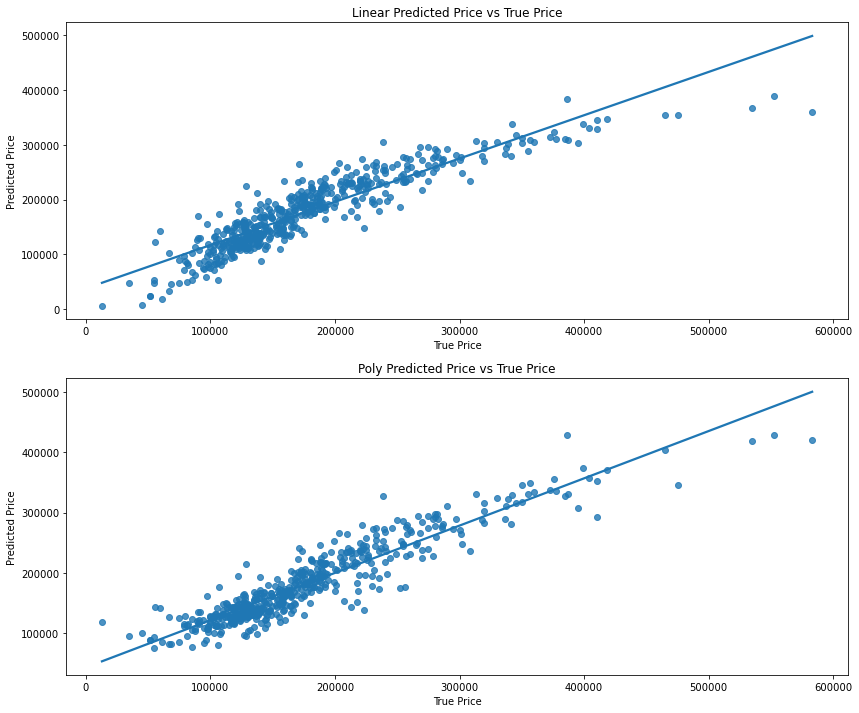

In [61]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Previous Plot
axes[0].set_title("Linear Predicted Price vs True Price")
ax1 = sns.regplot(ax=axes[0], x=y_test.loc[pred_index], y=y_pred, ci=None)
ax1.set_xlabel("True Price")
ax1.set_ylabel("Predicted Price")

# New Plot
axes[1].set_title("Poly Predicted Price vs True Price")
ax2 = sns.regplot(ax=axes[1], x=y_test.loc[pred_index], y=poly_y_pred, ci=None)
ax2.set_xlabel("True Price")
ax2.set_ylabel("Predicted Price");

##### Source (https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)

Text(0, 0.5, 'Predicted Price Error')

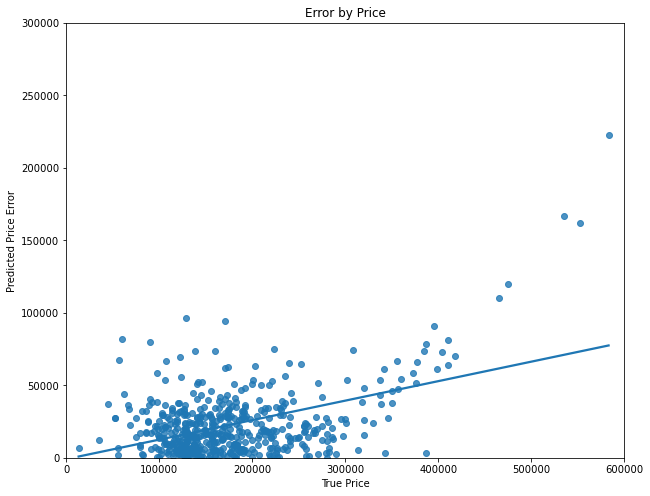

In [62]:
# Error Plot
plt.figure(figsize=(10, 8))
plt.title("Error by Price")
plt.xlim(0, 600_000)
plt.ylim(0, 300_000)
sns.regplot(x=y_test.loc[pred_index], y=round(np.abs(moving_error), 0), ci=None)
plt.xlabel("True Price")
plt.ylabel("Predicted Price Error")

Text(0, 0.5, 'Predicted Price Error')

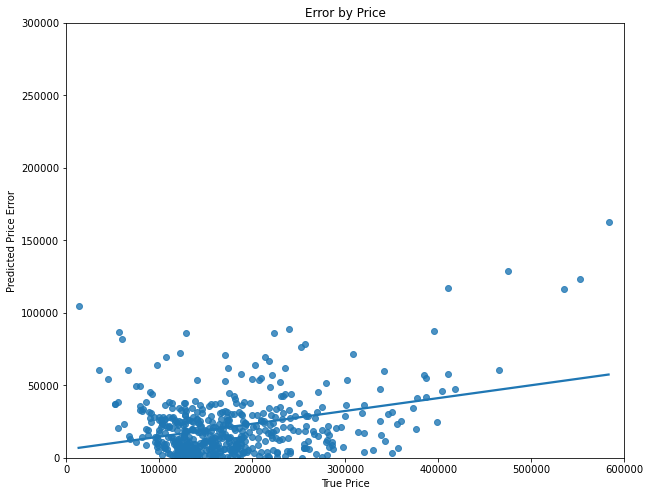

In [63]:
poly_moving_error = poly_y_pred - y_test.loc[pred_index]

# Error Plot
plt.figure(figsize=(10, 8))
plt.title("Error by Price")
plt.xlim(0, 600_000)
plt.ylim(0, 300_000)
sns.regplot(x=y_test.loc[pred_index], y=round(np.abs(poly_moving_error), 0), ci=None)
plt.xlabel("True Price")
plt.ylabel("Predicted Price Error")

(0.0, 160.0)

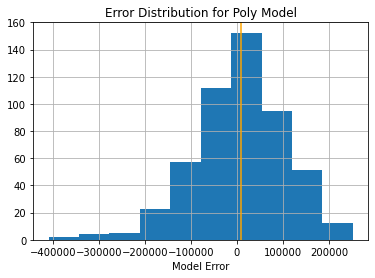

In [64]:
(poly_y_pred - y_test).hist()
plt.title("Error Distribution for Poly Model")
plt.xlabel("Model Error")
plt.vlines(x=(poly_y_pred - y_test).median(), ymin=0, ymax=160, color='orange')
plt.ylim(bottom=0, top=160)

#### Add Lasso Normalization to Poly

In [65]:
lasso = Lasso(alpha=100, max_iter=100_000)

lasso.fit(X_train_poly_scaled, y_train)

Lasso(alpha=100, max_iter=100000)

In [66]:
lasso_y_pred = lasso.predict(X_test_poly_scaled.loc[pred_index])

In [67]:
print(lasso.score(X_train_poly_scaled, y_train))
print(lasso.score(X_test_poly_scaled, y_test))

0.8690217149148596
0.8645757114242867


In [68]:
pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_).sort_values(by=0)

,0
quality,-29285.611036
total_basement_sqft sqft_1,-27453.690838
gr_living_sqft^2,-27262.447291
total_basement_sqft^2,-22189.506499
full_bath,-16741.922006
quality full_bath,-16142.825614
sqft_1 rooms_total,-12269.737451
gr_living_sqft sqft_1,-8994.615903
gr_living_sqft rooms_total,-6110.277264
rooms_total,-4701.875430


In [69]:
print(f'Training R2:            {lasso.score(X_train_poly_scaled, y_train)}')
print(f'Test R2:                {lasso.score(X_test_poly_scaled, y_test)}')
_ = round(lasso.score(X_test_poly_scaled, y_test) - lr_poly.score(X_test_poly_scaled, y_test), 4)
print(f'Model R2 improvement:   {_}')

Training R2:            0.8690217149148596
Test R2:                0.8645757114242867
Model R2 improvement:   0.0105


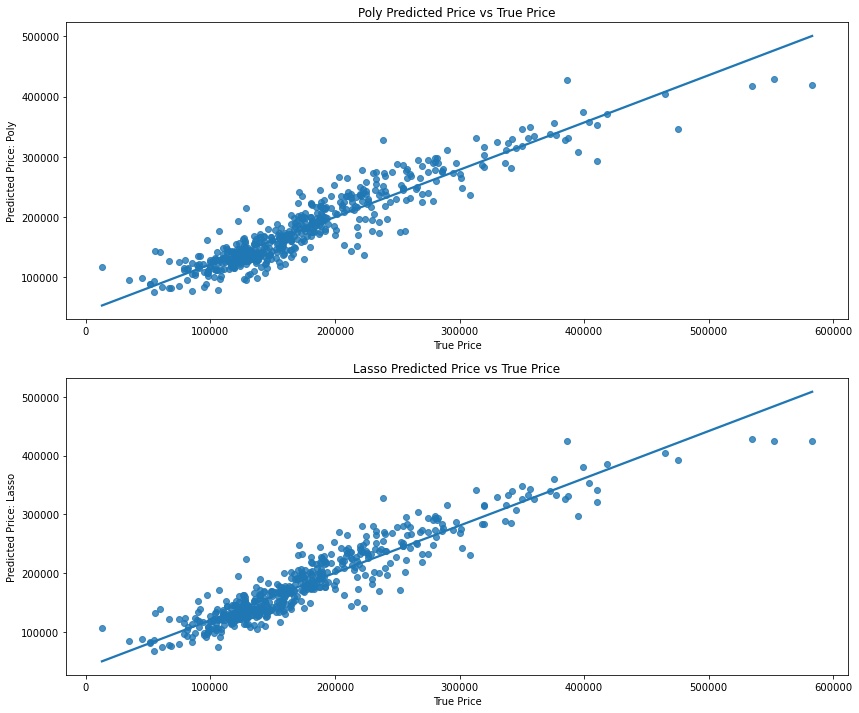

In [70]:
fig_1, axes_1 = plt.subplots(2, 1, figsize=(14, 12))

# Previous Plot
axes_1[0].set_title("Poly Predicted Price vs True Price")
ax1_1 = sns.regplot(ax=axes_1[0], x=y_test.loc[pred_index], y=poly_y_pred, ci=None)
ax1_1.set_xlabel("True Price")
ax1_1.set_ylabel("Predicted Price: Poly")

# New Plot
axes_1[1].set_title("Lasso Predicted Price vs True Price")
ax2_1 = sns.regplot(ax=axes_1[1], x=y_test.loc[pred_index], y=lasso_y_pred, ci=None)
ax2_1.set_xlabel("True Price")
ax2_1.set_ylabel("Predicted Price: Lasso");

Text(0, 0.5, 'Predicted Price Error')

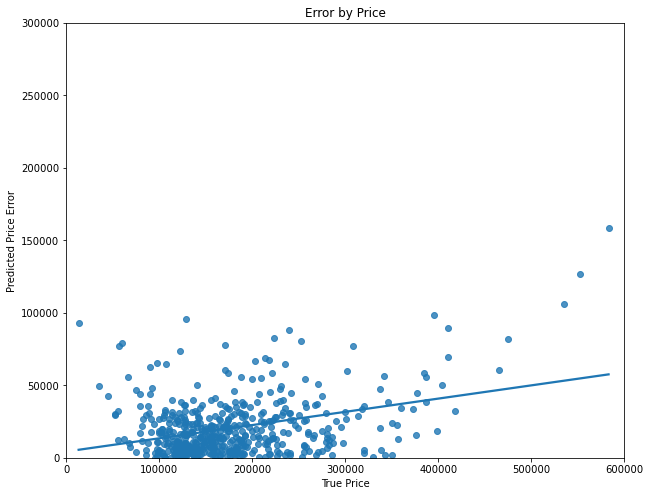

In [71]:
lasso_moving_error = lasso_y_pred - y_test.loc[pred_index]

# Error Plot
plt.figure(figsize=(10, 8))
plt.title("Error by Price")
plt.xlim(0, 600_000)
plt.ylim(0, 300_000)
sns.regplot(x=y_test.loc[pred_index], y=round(np.abs(lasso_moving_error), 0), ci=None)
plt.xlabel("True Price")
plt.ylabel("Predicted Price Error")

(0.0, 160.0)

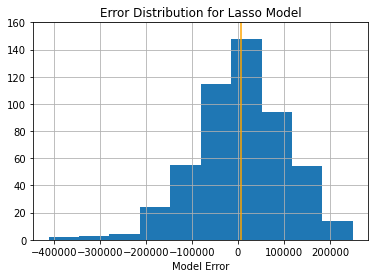

In [72]:
(lasso_y_pred - y_test).hist()
plt.title("Error Distribution for Lasso Model")
plt.xlabel("Model Error")
plt.vlines(x=(lasso_y_pred - y_test).median(), ymin=0, ymax=160, color='orange')
plt.ylim(bottom=0, top=160)

In [73]:
print(f'Poly RMSE:               {round(mean_squared_error(y_test.loc[pred_index], poly_y_pred, squared=False), 0)}')
print(f'Poly Lasso RMSE:         {round(mean_squared_error(y_test.loc[pred_index], lasso_y_pred, squared=False), 0)}')
_ = round(mean_squared_error(y_test.loc[pred_index], poly_y_pred, squared=False) - mean_squared_error(y_test.loc[pred_index], lasso_y_pred, squared=False), 0)
print(f'Model RMSE improvement:  {_}')

Poly RMSE:               29804.0
Poly Lasso RMSE:         28716.0
Model RMSE improvement:  1088.0


#### New Baseline Model Pipeline Construction

In [75]:
#pipe_base = make_pipeline()

In [76]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'frontage', 'lot_sqft',
       'street_material', 'alley', 'shape', 'contour', 'utilities', 'config',
       'slope', 'neighborhood', 'cond_1', 'cond_2', 'type', 'style', 'quality',
       'condition', 'year', 'remod_year', 'roof', 'roof_mat', 'ext_1', 'ext_2',
       'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'basement_qual', 'basement_cond', 'basement_exposure',
       'basement_fin_1', 'basement_fin_sqft_1', 'basement_fin_2',
       'basement_fin_sqft_2', 'basement_unfin_sqft', 'total_basement_sqft',
       'heating', 'heating_qc', 'ac', 'electrical', 'sqft_1', 'sqft_2',
       'low_qual_sqft', 'gr_living_sqft', 'basement_bath',
       'basement_half_bath', 'full_bath', 'half_bath', 'bed', 'kitchen',
       'kitchen_qual', 'rooms_total', 'functional', 'fireplaces',
       'fireplace_qual', 'garage_type', 'garage_year', 'garage_finish',
       'garage_size', 'garage_sqft', 'garage_qual', 'garage_con

In [77]:
df['bath'] = df['full_bath'] + df['half_bath']

In [262]:
X_base = df[['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'year', 'bath', 'rooms_total', 'lot_sqft']]
y = df['price']

In [264]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y)

### Develop Categorical Variables

In [689]:
base_poly = PolynomialFeatures(degree=2, include_bias=False)
base_ss = StandardScaler()
base_lasso = Lasso(max_iter=50_000, random_state=10)
base_params = {'alpha':[8, 10, 15]}
base_grid = GridSearchCV(base_lasso, base_params)



In [690]:
# Poly
X_base_train_poly = base_poly.fit_transform(X_base_train)
X_base_test_poly = base_poly.transform(X_base_test)
# Scale
X_base_train_scaled = base_ss.fit_transform(X_base_train_poly)
X_base_test_scaled = base_ss.transform(X_base_test_poly)
# Regularize
X_base_train_reg = base_grid.fit(X_base_train_scaled, y_base_train)

In [691]:
print(base_grid.best_estimator_)
print(base_grid.best_params_)
print(base_grid.best_score_)
pd.DataFrame(base_grid.cv_results_)

Lasso(alpha=10, max_iter=50000, random_state=10)
{'alpha': 10}
0.8113450373824131


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.966631,0.254062,0.000689,0.000125,8,{'alpha': 8},0.850059,0.814254,0.609955,0.887933,0.891316,0.810703,0.104235,3
1,0.739802,0.341364,0.000561,0.000056,10,{'alpha': 10},0.850547,0.814280,0.611962,0.887958,0.891978,0.811345,0.103605,1
2,0.463209,0.220319,0.000649,0.000144,15,{'alpha': 15},0.850654,0.814283,0.607534,0.888045,0.893592,0.810822,0.105583,2


In [692]:
base_poly = PolynomialFeatures(degree=2, include_bias=False)
base_ss = StandardScaler()
base_lasso = Lasso(max_iter=50_000, random_state=10, alpha=20)

In [693]:
X_train_poly.columns

Index(['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft',
       'sqft_1', 'year', 'full_bath', 'rooms_total', 'quality^2',
       'quality gr_living_sqft', 'quality garage_sqft',
       'quality total_basement_sqft', 'quality sqft_1', 'quality year',
       'quality full_bath', 'quality rooms_total', 'gr_living_sqft^2',
       'gr_living_sqft garage_sqft', 'gr_living_sqft total_basement_sqft',
       'gr_living_sqft sqft_1', 'gr_living_sqft year',
       'gr_living_sqft full_bath', 'gr_living_sqft rooms_total',
       'garage_sqft^2', 'garage_sqft total_basement_sqft',
       'garage_sqft sqft_1', 'garage_sqft year', 'garage_sqft full_bath',
       'garage_sqft rooms_total', 'total_basement_sqft^2',
       'total_basement_sqft sqft_1', 'total_basement_sqft year',
       'total_basement_sqft full_bath', 'total_basement_sqft rooms_total',
       'sqft_1^2', 'sqft_1 year', 'sqft_1 full_bath', 'sqft_1 rooms_total',
       'year^2', 'year full_bath', 'year rooms_total', 'fu

In [695]:
# Poly
X_base_train_poly = base_poly.fit_transform(X_base_train)
X_base_test_poly = base_poly.transform(X_base_test)
# Scale
X_base_train_scaled = base_ss.fit_transform(X_base_train_poly)
X_base_test_scaled = base_ss.transform(X_base_test_poly)
# Regularize
base_lasso.fit(X_base_train_scaled, y_base_train)

# Predict
y_base_pred = base_lasso.predict(X_base_test_scaled)
# Score
base_score = base_lasso.score(X_base_test_scaled, y_base_test)
print(base_score)
base_mse = mean_squared_error(y_base_test, y_base_pred, squared=False)
print(base_mse)

0.8688640184837734
26579.938157527107


In [697]:
X_base_train_poly = pd.DataFrame(X_base_train_poly, columns=base_poly.get_feature_names_out())
X_base_train_poly.head(2)

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft,quality^2,quality gr_living_sqft,...,year^2,year bath,year rooms_total,year lot_sqft,bath^2,bath rooms_total,bath lot_sqft,rooms_total^2,rooms_total lot_sqft,lot_sqft^2
0,6.0,1133.0,308.0,192.0,2008.0,1.0,7.0,9836.0,36.0,6798.0,...,4032064.0,2008.0,14056.0,19750688.0,1.0,7.0,9836.0,49.0,68852.0,96746896.0
1,7.0,2022.0,505.0,1160.0,1977.0,3.0,8.0,10005.0,49.0,14154.0,...,3908529.0,5931.0,15816.0,19779885.0,9.0,24.0,30015.0,64.0,80040.0,100100025.0


In [698]:
pd.DataFrame(np.round(base_lasso.coef_), base_poly.get_feature_names_out()).sort_values(0)

,0
gr_living_sqft rooms_total,-65156.0
quality,-36731.0
gr_living_sqft total_basement_sqft,-25795.0
total_basement_sqft^2,-18106.0
rooms_total,-18059.0
total_basement_sqft rooms_total,-17319.0
bath,-14600.0
garage_sqft bath,-12401.0
bath^2,-12242.0
quality bath,-11479.0


In [382]:
# Manual Categorizaton
# Lot Size/Shape

lot_cats = ['alley', 'street_material', 'shape', 'contour', 'config', 'slope', 'paved_drive', 'pool_qc', 'fence', 'misc',]

# Structure Size/Shape
prop_cats = ['roof', 'type', 'style', 'roof_mat', 'ext_1', 'ext_2', 'exter_qual', 'exter_cond', 'foundation', 'basement_qual', 'basement_cond', 'basement_exposure', 'basement_fin_1', 'basement_fin_2',
             'heating', 'heating_qc', 'ac', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qual', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond']

# Neighborhood Factors
neigh_cats = ['ms_zoning', 'ms_subclass', 'utilities', 'neighborhood', 'cond_1', 'cond_2', 'mas_vnr_type', 'sale_type']

In [699]:
ct1_cat = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse=False), make_column_selector(dtype_include=object)),   #could use index numbers or names
    remainder='passthrough',                                                                # passthrough untouched (numeric) columns
    verbose_feature_names_out=False
)

ct1_cat

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fda1b88ddc0>)],
                  verbose_feature_names_out=False)

In [704]:
X_1 = df[['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'year', 'bath', 'rooms_total', 'lot_sqft']]
y = df['price']

In [705]:
X_1.shape

(2051, 8)

In [706]:
df[neigh_cats].shape

(2051, 8)

In [703]:
X_1 = pd.merge(left=X_1, right=df['pool_qc'], how='outer', left_index=True, right_index=True)

In [707]:
X_1.head()

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft
0,6,1479,475.0,725.0,1976,3,6,13517
1,7,2122,559.0,913.0,1996,3,8,11492
2,5,1057,246.0,1057.0,1953,1,5,7922
3,5,1444,400.0,384.0,2006,3,7,9802
4,6,1445,484.0,676.0,1900,2,6,14235


In [708]:
X_1.isna().sum()

quality                0
gr_living_sqft         0
garage_sqft            0
total_basement_sqft    0
year                   0
bath                   0
rooms_total            0
lot_sqft               0
dtype: int64

In [335]:
X_1['pool_qc'] = X_1['pool_qc'].fillna(0)

In [351]:
X_1['pool_qc'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: pool_qc, dtype: int64

In [350]:
X_1['pool_qc'].map({
    'Gd':1,
    'Fa':1,
    'TA':1,
    'Ex':1,
}).value_counts()

1.0    7
Name: pool_qc, dtype: int64

In [315]:
X_1.isna().sum()

quality                0
gr_living_sqft         0
garage_sqft            0
total_basement_sqft    0
year                   0
bath                   0
rooms_total            0
lot_sqft               0
pool_qc                0
dtype: int64

In [709]:
ct1_cat.fit(X_1)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fda1b88ddc0>)],
                  verbose_feature_names_out=False)

In [710]:
X1_encoded = ct1_cat.transform(X_1)


In [711]:
X1_encoded = pd.DataFrame(X1_encoded, columns=ct1_cat.get_feature_names_out())
X1_encoded.head(2)

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft
0,6.0,1479.0,475.0,725.0,1976.0,3.0,6.0,13517.0
1,7.0,2122.0,559.0,913.0,1996.0,3.0,8.0,11492.0


In [712]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_encoded, y)
# Poly
X1_train_poly = base_poly.fit_transform(X1_train)
X1_test_poly = base_poly.transform(X1_test)
# Scale
X1_train_scaled = base_ss.fit_transform(X1_train_poly)
X1_test_scaled = base_ss.transform(X1_test_poly)
# Regularize
base_lasso.fit(X1_train_scaled, y1_train)

# Predict
y1_pred = base_lasso.predict(X1_test_scaled)
# Score
print(base_lasso.score(X1_test_scaled, y1_test))
mean_squared_error(y1_test, y1_pred, squared=False)

0.8491929037422633


30811.88937343045

#### Lot categories not helpful to model performance
#
#### Checking individual property categories

In [ ]:
prop_cats = ['roof', 'type', 'style', 'roof_mat', 'ext_1', 'ext_2', 'exter_qual', 'exter_cond', 'foundation', 'basement_qual', 'basement_cond', 'basement_exposure', 'basement_fin_1', 'basement_fin_2',
             'heating', 'heating_qc', 'ac', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qual', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond']

In [713]:
X_2 = df[['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'year', 'bath', 'rooms_total', 'lot_sqft']]
y = df['price']

X_2 = pd.merge(left=X_2, right=df['type'], how='outer', left_index=True, right_index=True)
X_2.head()

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft,type
0,6,1479,475.0,725.0,1976,3,6,13517,1Fam
1,7,2122,559.0,913.0,1996,3,8,11492,1Fam
2,5,1057,246.0,1057.0,1953,1,5,7922,1Fam
3,5,1444,400.0,384.0,2006,3,7,9802,1Fam
4,6,1445,484.0,676.0,1900,2,6,14235,1Fam


In [714]:
X_2.isna().sum()

quality                0
gr_living_sqft         0
garage_sqft            0
total_basement_sqft    0
year                   0
bath                   0
rooms_total            0
lot_sqft               0
type                   0
dtype: int64

In [715]:
ct1_cat.fit(X_2)
X2_encoded = ct1_cat.transform(X_2)
X2_encoded = pd.DataFrame(X2_encoded, columns=ct1_cat.get_feature_names_out())
X2_encoded.head(2)

,type_1Fam,type_2fmCon,type_Duplex,type_Twnhs,type_TwnhsE,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft
0,1.0,0.0,0.0,0.0,0.0,6.0,1479.0,475.0,725.0,1976.0,3.0,6.0,13517.0
1,1.0,0.0,0.0,0.0,0.0,7.0,2122.0,559.0,913.0,1996.0,3.0,8.0,11492.0


In [719]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_encoded, y, random_state=110)
# Poly
X2_train_poly = base_poly.fit_transform(X2_train)
X2_test_poly = base_poly.transform(X2_test)
# Scale
X2_train_scaled = base_ss.fit_transform(X2_train_poly)
X2_test_scaled = base_ss.transform(X2_test_poly)
# Regularize
base_lasso.fit(X2_train_scaled, y2_train)

# Predict
y2_pred = base_lasso.predict(X2_test_scaled)
# Score
print(f'training R2:   {base_lasso.score(X2_train_scaled, y2_train)}')
print(f'test R2:       {base_lasso.score(X2_test_scaled, y2_test)}')
print(f'base R2:       {base_score}\n')

print(f'training RMSE: {mean_squared_error(y2_train, base_lasso.predict(X2_train_scaled), squared=False)}')
print(f'test RMSE:     {mean_squared_error(y2_test, y2_pred, squared=False)}')
print(f'base RMSE:     {base_mse}')

training R2:   0.8844436841205661
test R2:       0.8947886468791815
base R2:       0.8688640184837734

training RMSE: 27059.70726645958
test RMSE:     25310.973606497748
base RMSE:     26579.938157527107


In [387]:
best_score = base_lasso.score(X2_test_scaled, y2_test)
best_rmse = mean_squared_error(y2_test, y2_pred, squared=False)

#### Keep Type!

In [388]:
prop_cats = ['roof', 'type', 'style', 'roof_mat', 'ext_1', 'ext_2', 'exter_qual', 'exter_cond', 'foundation', 'basement_qual', 'basement_cond', 'basement_exposure', 'basement_fin_1', 'basement_fin_2',
             'heating', 'heating_qc', 'ac', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qual', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond']

In [658]:
X_3 = df[['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'year', 'bath', 'rooms_total', 'lot_sqft', 'type']]
y = df['price']

X_3 = pd.merge(left=X_3, right=df['kitchen_qual'], how='outer', left_index=True, right_index=True)
X_3.head()

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft,type,kitchen_qual
0,6,1479,475.0,725.0,1976,3,6,13517,1Fam,Gd
1,7,2122,559.0,913.0,1996,3,8,11492,1Fam,Gd
2,5,1057,246.0,1057.0,1953,1,5,7922,1Fam,Gd
3,5,1444,400.0,384.0,2006,3,7,9802,1Fam,TA
4,6,1445,484.0,676.0,1900,2,6,14235,1Fam,TA


In [659]:
X_3.isna().sum()

quality                0
gr_living_sqft         0
garage_sqft            0
total_basement_sqft    0
year                   0
bath                   0
rooms_total            0
lot_sqft               0
type                   0
kitchen_qual           0
dtype: int64

In [494]:
# X_3['basement_fin_1'].value_counts()
X_3['basement_fin_1'].fillna('Unf', inplace=True)
X_3['basement_fin_2'].fillna('Unf', inplace=True)


In [660]:
X_3.isna().sum()

quality                0
gr_living_sqft         0
garage_sqft            0
total_basement_sqft    0
year                   0
bath                   0
rooms_total            0
lot_sqft               0
type                   0
kitchen_qual           0
dtype: int64

In [661]:
ct1_cat.fit(X_3)
X3_encoded = ct1_cat.transform(X_3)
X3_encoded = pd.DataFrame(X3_encoded, columns=ct1_cat.get_feature_names_out())
X3_encoded.head(2)

,type_1Fam,type_2fmCon,type_Duplex,type_Twnhs,type_TwnhsE,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,1479.0,475.0,725.0,1976.0,3.0,6.0,13517.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2122.0,559.0,913.0,1996.0,3.0,8.0,11492.0


In [673]:
base_lasso = Lasso(max_iter=70_000, random_state=5, alpha=10)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3_encoded, y, random_state=110)
# Poly
X3_train_poly = base_poly.fit_transform(X3_train)
X3_test_poly = base_poly.transform(X3_test)
# Scale
X3_train_scaled = base_ss.fit_transform(X3_train_poly)
X3_test_scaled = base_ss.transform(X3_test_poly)
# Regularize
base_lasso.fit(X3_train_scaled, y3_train)

# Predict
y3_pred = base_lasso.predict(X3_test_scaled)
# Score
print(f'training R2:   {base_lasso.score(X3_train_scaled, y3_train)}')
print(f'test R2:       {base_lasso.score(X3_test_scaled, y3_test)}')
print(f'best R2:       {best_score}\n')

print(f'training RMSE: {mean_squared_error(y3_train, base_lasso.predict(X3_train_scaled), squared=False)}')
print(f'test RMSE:     {mean_squared_error(y3_test, y3_pred, squared=False)}')
print(f'best RMSE:     {best_rmse}')

training R2:   0.9000517103758217
test R2:       0.9048717318352303
best R2:       0.9048717318352303

training RMSE: 25165.985015220405
test RMSE:     24067.575512694217
best RMSE:     24067.575512694217


#### Keep Kitchen Qual

In [569]:
best_score = base_lasso.score(X3_test_scaled, y3_test)
best_rmse = mean_squared_error(y3_test, y3_pred, squared=False)

In [ ]:
neigh_cats = ['ms_zoning', 'ms_subclass', 'utilities', 'neighborhood', 'cond_1', 'cond_2', 'mas_vnr_type', 'sale_type']

In [632]:
X_4 = df[['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'year', 'bath', 'rooms_total', 'lot_sqft', 'type', 'kitchen_qual', ]]
y = df['price']

X_4 = pd.merge(left=X_4, right=df['sale_type'], how='outer', left_index=True, right_index=True)
X_4.head()

,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft,type,kitchen_qual,sale_type
0,6,1479,475.0,725.0,1976,3,6,13517,1Fam,Gd,WD
1,7,2122,559.0,913.0,1996,3,8,11492,1Fam,Gd,WD
2,5,1057,246.0,1057.0,1953,1,5,7922,1Fam,Gd,WD
3,5,1444,400.0,384.0,2006,3,7,9802,1Fam,TA,WD
4,6,1445,484.0,676.0,1900,2,6,14235,1Fam,TA,WD


In [636]:
X_4['sale_type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: sale_type, dtype: int64

In [633]:
X_4.isna().sum()

quality                0
gr_living_sqft         0
garage_sqft            0
total_basement_sqft    0
year                   0
bath                   0
rooms_total            0
lot_sqft               0
type                   0
kitchen_qual           0
sale_type              0
dtype: int64

In [629]:
X_4['mas_vnr_type'].fillna('None', inplace=True)

In [634]:
ct1_cat.fit(X_4)
X4_encoded = ct1_cat.transform(X_4)
X4_encoded = pd.DataFrame(X4_encoded, columns=ct1_cat.get_feature_names_out())
X4_encoded.head(2)

,type_1Fam,type_2fmCon,type_Duplex,type_Twnhs,type_TwnhsE,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,sale_type_COD,...,sale_type_Oth,sale_type_WD,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6.0,1479.0,475.0,725.0,1976.0,3.0,6.0,13517.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,7.0,2122.0,559.0,913.0,1996.0,3.0,8.0,11492.0


In [635]:
base_lasso = Lasso(max_iter=70_000, random_state=5, alpha=10)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4_encoded, y, random_state=110)
# Poly
X4_train_poly = base_poly.fit_transform(X4_train)
X4_test_poly = base_poly.transform(X4_test)
# Scale
X4_train_scaled = base_ss.fit_transform(X4_train_poly)
X4_test_scaled = base_ss.transform(X4_test_poly)
# Regularize
base_lasso.fit(X4_train_scaled, y4_train)

# Predict
y4_pred = base_lasso.predict(X4_test_scaled)
# Score
print(f'training R2:   {base_lasso.score(X4_train_scaled, y4_train)}')
print(f'test R2:       {base_lasso.score(X4_test_scaled, y4_test)}')
print(f'best R2:       {best_score}\n')

print(f'training RMSE: {mean_squared_error(y4_train, base_lasso.predict(X4_train_scaled), squared=False)}')
print(f'test RMSE:     {mean_squared_error(y4_test, y4_pred, squared=False)}')
print(f'best RMSE:     {best_rmse}')

training R2:   0.9058177678356159
test R2:       0.9049761576384626
best R2:       0.9048717318352303

training RMSE: 24429.284089565976
test RMSE:     24054.361953460048
best RMSE:     24067.575512694217


### X3 is our best model so far. Plot it:

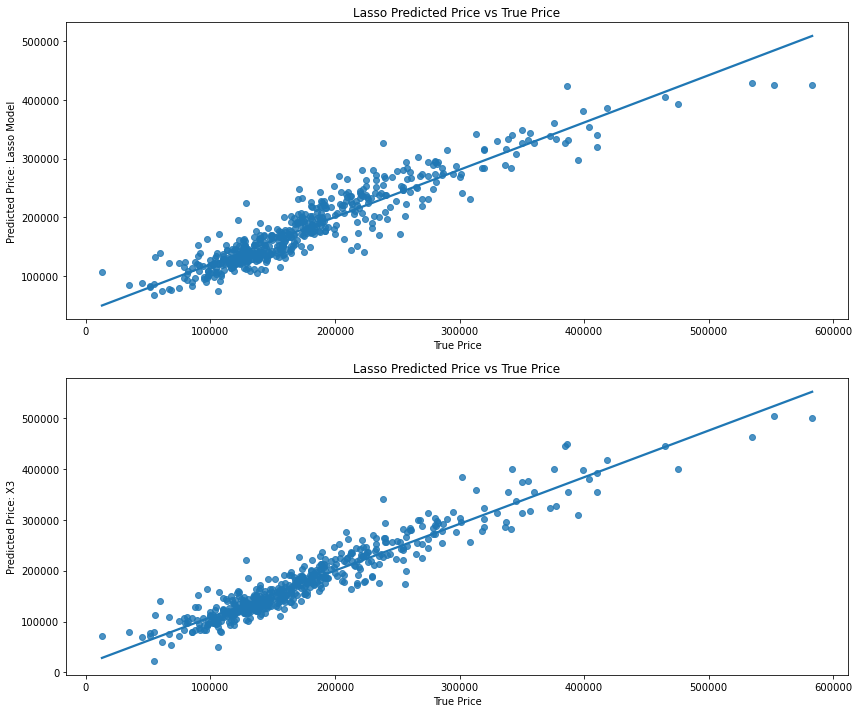

In [639]:
fig_2, axes_2 = plt.subplots(2, 1, figsize=(14, 12))

# Previous Plot
axes_2[0].set_title("Lasso Predicted Price vs True Price")
ax1_2 = sns.regplot(ax=axes_2[0], x=y_test.loc[pred_index], y=lasso_y_pred, ci=None)
ax1_2.set_xlabel("True Price")
ax1_2.set_ylabel("Predicted Price: Lasso Model")

# New Plot
axes_2[1].set_title("Lasso Predicted Price vs True Price")
ax2_2 = sns.regplot(ax=axes_2[1], x=y3_test, y=y3_pred, ci=None)
ax2_2.set_xlabel("True Price")
ax2_2.set_ylabel("Predicted Price: X3");

### Submit scores

In [724]:
testing = pd.read_csv('./datasets/test.csv')
testing.rename(columns=column_dict, inplace=True)
testing['bath'] = testing['full_bath'] + testing['half_bath']

In [725]:
X_submit_1 = testing[['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'year', 'bath', 'rooms_total', 'lot_sqft', 'type']]

In [726]:
ct1_cat.fit(X_submit_1)
X_submit_1_encoded = ct1_cat.transform(X_submit_1)
X_submit_1_encoded = pd.DataFrame(X_submit_1_encoded, columns=ct1_cat.get_feature_names_out())
X_submit_1_encoded.head(2)

,type_1Fam,type_2fmCon,type_Duplex,type_Twnhs,type_TwnhsE,quality,gr_living_sqft,garage_sqft,total_basement_sqft,year,bath,rooms_total,lot_sqft
0,0.0,1.0,0.0,0.0,0.0,6.0,1928.0,440.0,1020.0,1910.0,2.0,9.0,9142.0
1,0.0,0.0,1.0,0.0,0.0,5.0,1967.0,580.0,1967.0,1977.0,2.0,10.0,9662.0


In [722]:
X_submit_1_encoded.shape

(878, 8)

In [671]:
X_submit_1_encoded.drop(columns='kitchen_qual_Po', inplace=True)

In [727]:
# Poly
X_submit_1_poly = base_poly.transform(X_submit_1_encoded)

# Scale
X_submit_1_scaled = base_ss.transform(X_submit_1_poly)

# Predict
y_submit_1_pred = base_lasso.predict(X_submit_1_scaled)


In [728]:
testing['SalePrice'] = y_submit_1_pred
testing[['id', 'SalePrice']].rename(columns={'id':'Id'}).to_csv('./submissions/X2_submit.csv', index=False)

In [305]:
ct1_num = make_column_transformer(
    (PolynomialFeatures(degree=3, include_bias=False, ), make_column_selector(dtype_include=numeric)),   #could use index numbers or names
    remainder='passthrough',                                                                # passthrough untouched (numeric) columns
    verbose_feature_names_out=False
)

ct1_num

ColumnTransformer(remainder='passthrough',
                  transformers=[('polynomialfeatures',
                                 PolynomialFeatures(degree=3,
                                                    include_bias=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc22c324910>)],
                  verbose_feature_names_out=False)

In [318]:
df.columns[df.dtypes == 'object']

Index(['ms_zoning', 'street_material', 'alley', 'shape', 'contour',
       'utilities', 'config', 'slope', 'neighborhood', 'cond_1', 'cond_2',
       'type', 'style', 'roof', 'roof_mat', 'ext_1', 'ext_2', 'mas_vnr_type',
       'exter_qual', 'exter_cond', 'foundation', 'basement_qual',
       'basement_cond', 'basement_exposure', 'basement_fin_1',
       'basement_fin_2', 'heating', 'heating_qc', 'ac', 'electrical',
       'kitchen_qual', 'functional', 'fireplace_qual', 'garage_type',
       'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc',
       'fence', 'misc', 'sale_type'],
      dtype='object')

In [308]:
df_encoded = ct1_num.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded, columns=ct1_num.get_feature_names_out())
df_encoded

,id,pid,ms_subclass,frontage,"lot_sqft,",quality,condition,year,remod_year,mas_vnr_area,...,fireplace_qual,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc,sale_type
0,109.0,533352170.0,60.0,0.0,13517.0,6.0,8.0,1976.0,2005.0,289.0,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,544.0,531379050.0,60.0,43.0,11492.0,7.0,5.0,1996.0,1997.0,132.0,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,153.0,535304180.0,20.0,68.0,7922.0,5.0,7.0,1953.0,2007.0,0.0,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,318.0,916386060.0,60.0,73.0,9802.0,5.0,5.0,2006.0,2007.0,0.0,...,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,255.0,906425045.0,50.0,82.0,14235.0,6.0,8.0,1900.0,1993.0,0.0,...,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587.0,921126030.0,20.0,79.0,11449.0,8.0,5.0,2007.0,2007.0,0.0,...,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD
2047,785.0,905377130.0,30.0,0.0,12342.0,4.0,5.0,1940.0,1950.0,0.0,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
2048,916.0,909253010.0,50.0,57.0,7558.0,6.0,6.0,1928.0,1950.0,0.0,...,TA,Detchd,Unf,Fa,Fa,Y,NaN,NaN,NaN,WD
2049,639.0,535179160.0,20.0,80.0,10400.0,4.0,5.0,1956.0,1956.0,0.0,...,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD


In [146]:
ct1_num.get_feature_names_out()
len(ct1_num.get_feature_names_out())

11521

In [149]:
df_encoded = ct1_num.transform(df)
df_encoded = ct1_cat.transform(df_encoded)

ValueError: X has 11521 features, but ColumnTransformer is expecting 81 features as input.

In [200]:
# To do:
# find outliers
# simple categorical vars
# binning upper categorical vars
# custom metrics
#